# Customer Segmentation - Using K-means Clustering

Looking at customer sales dataset segmentations using unsupervised (unlabeled data) machine learning algorithm k-means clustering.

The dataset contains 5 features for 200 individual customers.
- Customer ID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1 - 100)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [23]:
data = pd.read_csv('Mall_Customers.csv')

In [24]:
# check shape of dataframe
data.shape

(200, 5)

In [25]:
# view first rows of dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# view statistics of dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The output above shows that 'Gender' is the only variable in the dataset that is non integer.

### Pairwise plots

In [28]:
import seaborn as sns

In [29]:
# remove 'Customer ID' from dataset
data_p = data.drop(columns=['CustomerID'])

In [30]:
data_p.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


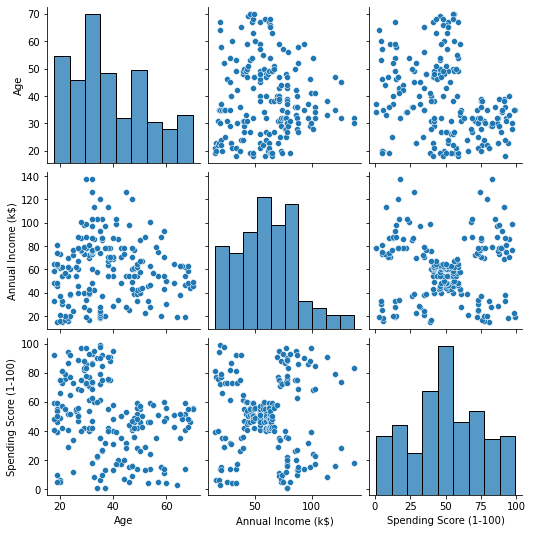

In [31]:
# Plot pairwise relationships between the variables
sns.pairplot(data_p)

In [32]:
# create a new dataframe, using only 'Annual income' and 'Spending score'
# use iloc to return selected columns and rows

data2 = data.iloc[:, [3,4]].values      # using columns 3 and 4

In [33]:
# Check the values of new dataset
data2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Establish the optimum number of clusters

In [34]:
# create a blank list
wcss = []                           # wcss: Within Cluster Sum of Squares

In [35]:
# train model
for i in range(1,15):                                                       # run up to a maximum of 15 clusters
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)        # using a smart initialiser
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)                                            # segregates the data points into clusters 

C:\Users\leftf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


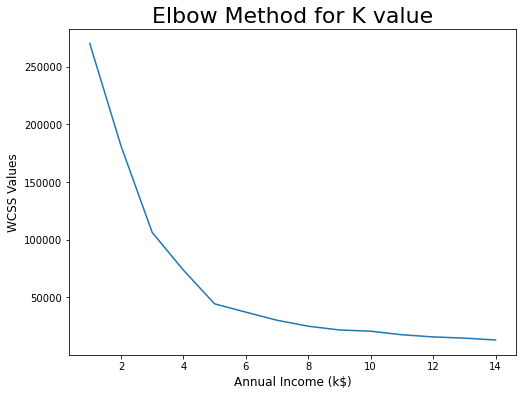

In [15]:
plt.figure(figsize = (8,6))                          
plt.plot(range(1,15), wcss)
plt.title('Elbow Method for K value', fontsize=22)  
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('WCSS Values', fontsize=12)
plt.show()

The above elbow plot is used to establish the optimal k value for the dataset. From visual inspection the point on the line with the largest angle occurs at 5 on the x-axis (this is where the rate of descent slows). Therefore the optimal k value for this dataset is 5.

In [36]:
# Initialise the k-means model

model = KMeans(n_clusters = 5, init='k-means++', random_state=0)     # init: method for initilisation 

In [37]:
# Use model to make predictions

pred_kmeans = model.fit_predict(data2)

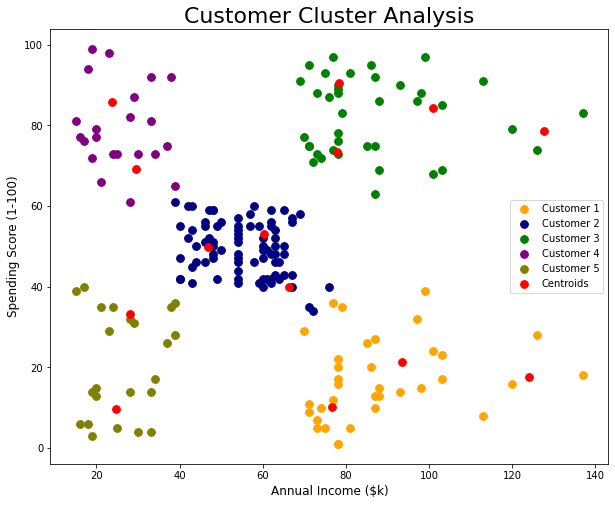

In [38]:
# Plot 
plt.figure(figsize = (10,8))                             
plt.title('Customer Cluster Analysis', fontsize=22)
plt.xlabel('Annual Income ($k)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

# Plot the 5 clusters
# each clusters is assigned a point in the matrix
plt.scatter(data2[pred_kmeans==0,0], data2[pred_kmeans==0,1], s=60, c="orange", label='Customer 1')     
plt.scatter(data2[pred_kmeans==1,0], data2[pred_kmeans==1,1], s=60, c="navy", label='Customer 2')   
plt.scatter(data2[pred_kmeans==2,0], data2[pred_kmeans==2,1], s=60, c="green", label='Customer 3') 
plt.scatter(data2[pred_kmeans==3,0], data2[pred_kmeans==3,1], s=60, c="purple", label='Customer 4') 
plt.scatter(data2[pred_kmeans==4,0], data2[pred_kmeans==4,1], s=60, c="olive", label='Customer 5')

#Plot the centroids:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c ='red', label = 'Centroids')


plt.legend()
plt.show()

Upon visual inspection we can see that cluster 'Customer 2' contains the most amount of points than the other clusters. 
We can see that this plot resembles one of the plots in the pairwise output.

In [39]:
# Obtain silhoutte score
from sklearn.metrics import silhouette_score

In [40]:
score = silhouette_score (data2, kmeans.labels_)
print('Kmeans silhoutte score is:', score)

Kmeans silhoutte score is: 0.40466460708668867


This score indicates the quality of the clusters from the cluster algorithm. This score can range from -1 to 1. The model gave a silhoutte score of 0.4047. This implies that the model achieved approximately 40% separation between the clusters.